Data Collection

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''


In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)
search_words = "#‡§Ü‡§à‡§™‡•Ä‡§è‡§≤"
date_since = "2010-11-16"
new_search = search_words + " -filter:retweets"


In [ ]:
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
d=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
e=[tweet.full_text for tweet in tweets]


In [ ]:
search_words = "#‡§ï‡•ã‡§∞‡•ã‡§®‡§æ"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
f=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
g=[tweet.full_text for tweet in tweets]

In [ ]:
search_words = "#‡§Æ‡•ã‡§¶‡•Ä"
new_search = search_words + " -filter:retweets"
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="hi",
              tweet_mode="extended",
              since=date_since).items(500)
h=[tweet.full_text for tweet in tweets]

In [ ]:
t=d+e+f+g+h


In [ ]:
tw=[]
for tweets in t:
  tw.append(tweets)


In [ ]:
tw

Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import itertools as it
import spacy
from spacy.lang.hi import Hindi
import regex as re
nlp_hi = Hindi()


In [ ]:
extended_stop_words = ['‡§ú‡•Ä','‡§∂‡•ç‡§∞‡•Ä','|','l','‡§∂‡•ç‡§∞‡•Ä‡§Æ‡§§‡•Ä']
for stopword in extended_stop_words:
    lexeme = nlp_hi.vocab[stopword]
    lexeme.is_stop = True

In [ ]:
def preprocessing_hi(text_hi):
  tweet_hi = []
  tokenized_text = nlp_hi(text_hi)
  for token in tokenized_text:
    if(token.text!='\n\n'
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_email
        and not token.is_digit
        and not token.is_quote
        and (re.search(r'@\S+',token.text) is None)
        and not token.like_url):
      tweet_hi.append(token.text)


  tweet = ' '.join([token  for token in tweet_hi])
  return tweet

In [ ]:
df=pd.read_csv("tweetSet.csv")
x=df['Tweets'].tolist()

In [ ]:
len(x)

1001

In [ ]:
p=[]
for tweets in x:
  p.append(preprocessing_hi(tweets))

In [ ]:
! pip install demoji
import demoji
pt=[]
for tweet in p:
  tweet=tweet.replace('\\n','')
  tweet=tweet.replace('#','')
  tweet=demoji.replace(tweet,'')
  pt.append(tweet)


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.9/42.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
pt

['‡§¶‡•á‡§∂ ‡§¨‡§°‡§º‡•Ä ‡§¨‡§ï‡§µ‡§æ‡§∏ ‡§®‡§æ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶ ‡§®‡§ø‡§∞‡§æ‡§∂‡§æ Rafool NakliGandhi Rafool NakliGandhi  CHAMCHAS ‡§¶‡•á‡§∂ ‡§∏‡§ö‡•ç‡§ö‡§æ ‡§∏‡§ü‡•Ä‡§ï ‡§π‡§ø‡§®‡•ç‡§¶‡•Å‡§ì‡§Ç ‡§∏‡•Ç‡§∞‡•ç‡§Ø‡•ã‡§¶‡§Ø ‡§∏‡§ø‡§∞‡•ç‡§´ ‡§∏‡§ø‡§∞‡•ç‡§´ ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä YugpurushModiji',
 '‡§π‡§æ ‡§≤‡•ã‡§ó‡•ã ‡§∂‡•å‡§ï ‡§ö‡§¢‡§º‡§æ ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§∞‡§ñ‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§á‡§Ç‡§§‡§ú‡§æ‡§Æ ‡§≤‡•ã‡§ó‡•ã ‡§ï‡§≠‡•Ä ‡§®‡§π‡•Ä ‡§∞‡§ñ‡§®‡§æ ‡§™‡§°‡§º‡§§‡§æ ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§≠‡§∞‡•ã‡§∏‡§æ ‡§¨‡§ö‡§æ ‡§®‡§π‡•Ä ‡§≤‡•ã‡§ó ‡§á‡§Ç‡§§‡§ú‡§æ‡§Æ ‡§ñ‡•Å‡§¶ ‡§ï‡§∞‡•á‡§ó‡•á',
 '‡§¨‡§æ‡§§ ‡§¨‡•ã‡§≤ ‡§π‡•Å ‡§Ü‡§®‡•á ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡•ã‡§ó‡•ã ‡§∏‡§Æ‡§ù‡§®‡§æ ‡§π‡•ã‡§ó‡§æ AAP ‡§¨‡§∏ ‡§µ‡•ã‡§ü ‡§ï‡§æ‡§ü‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§™‡§æ‡§≤ ‡§∞‡§ñ‡•Ä ‡§Ö‡§™‡§®‡§æ ‡§µ‡•ã‡§ü ‡§¨‡§æ‡§ü‡§®‡•á ‡§¶‡•á UP Goa Punjab and ‡§â‡§§‡•ç‡§§‡§∞‡§æ‡§ñ‡§Ç‡§° ‡§ß‡•ç‡§Ø‡§æ‡§® ‡§∞‡§ñ‡•á ‡§Æ‡•ã‡§¶‡•Ä ‡§π‡§∞‡§æ‡§®‡§æ ‡§µ‡•ã‡§ü ‡§ï‡§ü‡§µ‡§æ‡§ì ‡§∏‡§æ‡§µ‡§ß‡§æ‡§®ModiResign WhistlePodu',
 '‡§Ü‡§∞‡

In [ ]:
len(pt)

1001

In [ ]:
import pandas as pd
import codecs
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv("HindiSentiWordnet.txt", delimiter=' ')
fields = ['POS_TAG', 'ID', 'POS', 'NEG', 'LIST_OF_WORDS']

In [ ]:
words_dict = {}
for i in data.index:
    words = data[fields[4]][i].split(',')
    for word in words:
        words_dict[word] = (data[fields[0]][i], data[fields[2]][i], data[fields[3]][i])

Algorithms

In [ ]:
def sentiment(text):
    words = word_tokenize(text)
    pos_polarity = 0
    neg_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict:
            pos_tag, pos, neg = words_dict[word]
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                elif neg > pos:
                    neg_polarity += neg
    polarity=pos_polarity-neg_polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
s=[]
for i in pt:
  s.append(sentiment(i))

In [ ]:
import pandas as pd
dict={'tweets':pt,'sentiment':s}
df2 = pd.DataFrame(dict)


In [ ]:
df2.head()

tweets sentiment
0  ‡§¶‡•á‡§∂ ‡§¨‡§°‡§º‡•Ä ‡§¨‡§ï‡§µ‡§æ‡§∏ ‡§®‡§æ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶ ‡§®‡§ø‡§∞‡§æ‡§∂‡§æ Rafool NakliGan...  negative
1  ‡§π‡§æ ‡§≤‡•ã‡§ó‡•ã ‡§∂‡•å‡§ï ‡§ö‡§¢‡§º‡§æ ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§∞‡§ñ‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§á...   neutral
2  ‡§¨‡§æ‡§§ ‡§¨‡•ã‡§≤ ‡§π‡•Å ‡§Ü‡§®‡•á ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡•ã‡§ó‡•ã ‡§∏‡§Æ‡§ù‡§®‡§æ ‡§π‡•ã‡§ó‡§æ AAP ‡§¨‡§∏ ‡§µ‡•ã...  negative
3  ‡§Ü‡§∞‡§ï‡•ç‡§∑‡§£ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§π‡•Ç‡§Ç ‡§ï‡§ø‡§Ç‡§§‡•Å ‡§µ‡•ã‡§ü ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§¶‡•Ç‡§Ç‡§ó‡§æ, ‡§Ü‡§∞‡§ï‡•ç...   neutral
4                                       ‡§∞‡§æ‡§π‡•Å‡§≤ ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä   neutral

In [ ]:
from sklearn.metrics import accuracy_score
pred_y = []
actual_y = []
pred_y=df2['sentiment'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

41.45854145854146


In [ ]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(actual_y, pred_y, labels=["positive","negative" ,"neutral"])

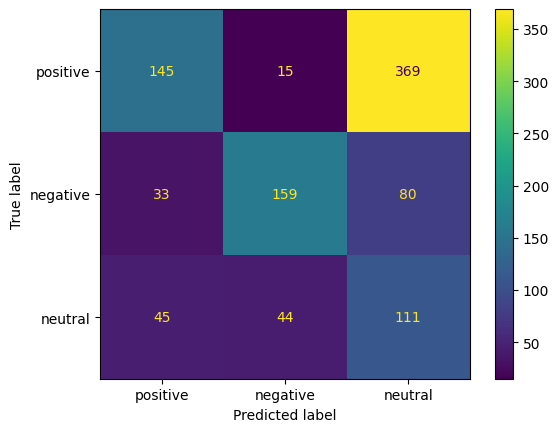

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=["positive","negative" ,"neutral"])
disp.plot()
plt.show()

In [ ]:
def sentiment2(text):
    words = word_tokenize(text)
    votes = []
    pos_polarity = 0
    neg_polarity = 0
    allowed_words = ['a','v','r','n']#adverbs, nouns, adjective, verb
    for word in words:
        if word in words_dict:
            pos_tag, pos, neg = words_dict[word]
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                    votes.append(1)
                elif neg > pos:
                    neg_polarity += neg
                    votes.append(0)
    pos_votes = votes.count(1)
    neg_votes = votes.count(0)
    if pos_votes > neg_votes:
        return 'positive'
    elif neg_votes > pos_votes:
        return 'negative'
    else:
        if pos_polarity < neg_polarity:
            return 'negative'
        else:
            return 'positive'



In [ ]:
s2=[]
for i in pt:
  s2.append(sentiment2(i))

In [ ]:
df2['sentiment2']=s2


In [ ]:
df2.head()

tweets sentiment sentiment2
0  ‡§¶‡•á‡§∂ ‡§¨‡§°‡§º‡•Ä ‡§¨‡§ï‡§µ‡§æ‡§∏ ‡§®‡§æ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶ ‡§®‡§ø‡§∞‡§æ‡§∂‡§æ Rafool NakliGan...  negative   negative
1  ‡§π‡§æ ‡§≤‡•ã‡§ó‡•ã ‡§∂‡•å‡§ï ‡§ö‡§¢‡§º‡§æ ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§∞‡§ñ‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§á...   neutral   positive
2  ‡§¨‡§æ‡§§ ‡§¨‡•ã‡§≤ ‡§π‡•Å ‡§Ü‡§®‡•á ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡•ã‡§ó‡•ã ‡§∏‡§Æ‡§ù‡§®‡§æ ‡§π‡•ã‡§ó‡§æ AAP ‡§¨‡§∏ ‡§µ‡•ã...  negative   negative
3  ‡§Ü‡§∞‡§ï‡•ç‡§∑‡§£ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§π‡•Ç‡§Ç ‡§ï‡§ø‡§Ç‡§§‡•Å ‡§µ‡•ã‡§ü ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§¶‡•Ç‡§Ç‡§ó‡§æ, ‡§Ü‡§∞‡§ï‡•ç...   neutral   positive
4                                       ‡§∞‡§æ‡§π‡•Å‡§≤ ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä   neutral   positive

In [ ]:
pred_y = []
actual_y = []
pred_y=df2['sentiment2'].tolist()
actual_y=df['Sentiment'].tolist()
print(accuracy_score(actual_y, pred_y) * 100)

67.53246753246754


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_y, pred_y, labels=["positive","negative"])

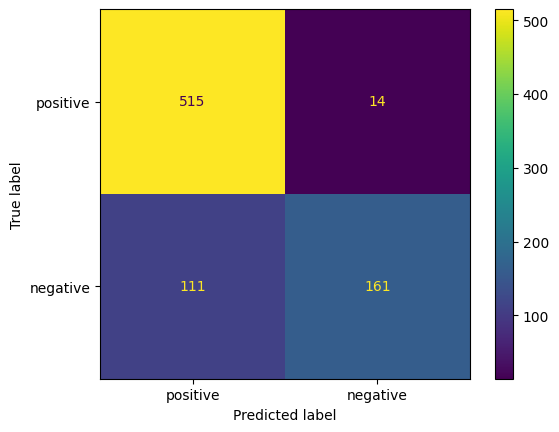

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["positive","negative"])
disp.plot()
plt.show()

In [ ]:
# df3 = pd.concat([df,df2], axis=1)
df3 = pd.concat([df2[['tweets', 'sentiment']],df[['Sentiment']]], axis=1)
# df3.drop(['Tweets', 'sentiment2'])
df4 = df3.rename(columns={"sentiment": "Predicted_Sentiment", "Sentiment": "Actual_Sentiment", "tweets": "Preprocessed_Tweets"})
df4.head(10)

Preprocessed_Tweets Predicted_Sentiment  \
0  ‡§¶‡•á‡§∂ ‡§¨‡§°‡§º‡•Ä ‡§¨‡§ï‡§µ‡§æ‡§∏ ‡§®‡§æ‡§â‡§Æ‡•ç‡§Æ‡•Ä‡§¶ ‡§®‡§ø‡§∞‡§æ‡§∂‡§æ Rafool NakliGan...            negative   
1  ‡§π‡§æ ‡§≤‡•ã‡§ó‡•ã ‡§∂‡•å‡§ï ‡§ö‡§¢‡§º‡§æ ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§∞‡§ñ‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§∏‡§ø‡§≤‡•á‡§Ç‡§°‡§∞ ‡§á...             neutral   
2  ‡§¨‡§æ‡§§ ‡§¨‡•ã‡§≤ ‡§π‡•Å ‡§Ü‡§®‡•á ‡§ö‡•Å‡§®‡§æ‡§µ ‡§≤‡•ã‡§ó‡•ã ‡§∏‡§Æ‡§ù‡§®‡§æ ‡§π‡•ã‡§ó‡§æ AAP ‡§¨‡§∏ ‡§µ‡•ã...            negative   
3  ‡§Ü‡§∞‡§ï‡•ç‡§∑‡§£ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§π‡•Ç‡§Ç ‡§ï‡§ø‡§Ç‡§§‡•Å ‡§µ‡•ã‡§ü ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§¶‡•Ç‡§Ç‡§ó‡§æ, ‡§Ü‡§∞‡§ï‡•ç...             neutral   
4                                       ‡§∞‡§æ‡§π‡•Å‡§≤ ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä             neutral   
5  ModiResignOrRepeal ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§Æ‡§ø‡§§‡•ç‡§∞‡•ã ‡§µ‡§ï‡•ç‡§§ ‡§¶‡•á‡§∂ ‡§Æ‡§æ‡§´‡•Ä...             neutral   
6  ‡§Æ‡§à ‡§™‡§π‡§≤‡§æ ‡§™‡•ç‡§∞‡§∂‡•ç‡§®‡§™‡§§‡•ç‡§∞‡§ï‡§æ‡§∞ ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§∏‡•Ä‡§ü ‡§ú‡•Ä‡§§ ‡§ï‡•ç‡§Ø‡•ã‡§Ç ‡§Æ...            negative   
7  ‡§â‡§§‡•ç‡§∏‡§µ ‡§∏‡•Å‡§®‡•á ‡§¨‡•Ä‡§ú‡•á‡§™‡•Ä ‡§ï‡§æ‡§∞‡•ç‡§Ø‡§ï‡§æ‡§≤ ‡§â‡§§‡•ç‡§∏‡§µ ‡§®‡§æ‡§Æ ‡§ú‡•Å‡§°‡§º ‡§ó‡§æ‡§Ø‡§æ...             neutral   
8  ‡§µ‡•ã ‡§ö‡•Å‡§®‡§æ‡§µ‡§Ü‡§Ø‡•ã‡§ó ‡§®‡•á‡§§‡§æ‡§ì‡§Ç ‡§®‡§æ‡§ö‡§§‡§æ ‡§∂‡•á‡§∑‡§£ ‡§ö‡•Å‡§®‡§æ‡§µ ‡§Ü‡§Ø‡•Å‡§ï‡•ç‡§§ ‡§â‡§∏...             neutral   
9  ‡§Ö‡§≠‡§ø‡§µ‡•ç‡§Ø‡§ï‡•ç‡§§‡§ø ‡§Ü‡§ú‡§æ‡§¶‡•Ä ‡§ï‡•ç‡§Ø‡§æ ‡§∏‡§ø‡§∞‡•ç‡§´ ‡§¶‡§≤‡§ø‡§§‡•ã‡§Ç ‡§¶‡•Ä ‡§ó‡§à ‡§Æ‡§∞‡•ç‡§ú‡•Ä...             neutral   

  Actual_Sentiment  
0         negative  
1         positive  
2         negative  
3         negative  
4         positive  
5         positive  
6         negative  
7         positive  
8         positive  
9         positive